# Tugas Naive Bayes

#### Dataset : Algerian Forest Fire Dataset from UCI
#### Dugaan : Prediksi kebakaran Hutan
#### **********************************************
#### Nama : Sri Handini (20110019)
#### Kelompok : 7
#### Nama anggota Kelompok : Elisabeth A (20110003), Sri Handini (20110019) Ryana P (20110017)

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

## DATASET

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [2]:
df = pd.read_excel('Algerian.xlsx')
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Category
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,no
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,no
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,no
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,no
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,no
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,yes
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,no
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,no
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,no


# Visualisasi

In [3]:
df.groupby('Category').size()

Category
no        106
yes       137
dtype: int64

# Label Encoder

1. label 0 for no
2. label 1 for yes

In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

# Split  Data

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit the model
gnb_model = gnb.fit(x_train, y_train)
gnb_result = gnb_model.score(x_test,y_test)
print('Naive Bayes accuracy for test set : %f' % gnb_result)

Naive Bayes accuracy for test set : 0.959184


In [8]:
from sklearn.metrics import classification_report
y_true, y_pred  = y_test, gnb_model.predict(x_test)
print(classification_report(y_true, y_pred ))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.96      0.96      0.96        26

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



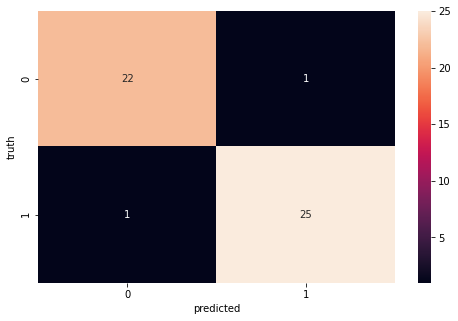

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.metrics import confusion_matrix

f, ax = plt.subplots(figsize=(8,5))
y_true, y_pred = y_test, gnb_model.predict(x_test)
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

# Correlation

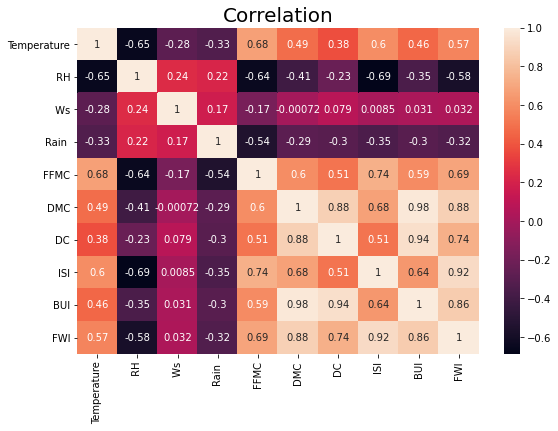

In [10]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,ax=ax,)
plt.yticks(rotation=360)
plt.title("Correlation",fontsize=20)
plt.show()